In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#all the lib

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


 ##scikit-learn, used for:

Encoding categorical text

Splitting data into train/test

Building & evaluating the model

In [5]:
np.random.seed(42)


ensures results are repeatable every time the code runs.

In [6]:
brands = ['HP', 'Dell', 'Lenovo', 'Asus', 'Acer', 'MSI', 'Apple']


mulated list of laptop brands

In [7]:
ratings = np.round(np.random.uniform(3.0, 5.0, 100), 1)


Simulates 100 random ratings between 3.0 and 5.0

.round(1) keeps only one decimal place

In [8]:
prices = np.random.randint(30000, 90000, 100)


Simulates 100 laptop prices between ₹30,000 and ₹90,000

In [9]:
brand_choices = np.random.choice(brands, 100)

andomly selects a brand for each of 100 laptops


In [10]:
titles = [f"{b} Laptop with i5" for b in brand_choices]


Simulated product title text (e.g., “Dell Laptop with i5”)

In [11]:
df = pd.DataFrame({
    "Title": titles,
    "Price": prices,
    "Rating": ratings,
    "Brand": brand_choices
})


Creates the final product listings table
(like scraped Flipkart data but simulated)

In [17]:
def simulate_click(row):
    if row["Price"] < 50000 and row["Rating"] >= 4.2:
        return np.random.choice([1, 0], p=[0.75, 0.25])
    elif row["Rating"] >= 4.0:
        return np.random.choice([1, 0], p=[0.6, 0.4])
    else:
        return np.random.choice([1, 0], p=[0.3, 0.7])



If product is affordable + highly rated, high click chance (75%),
if only rating is good, still decent chance (60%),
If rating is low, chance drops to 30%.

In [18]:
df["Clicked"] = df.apply(simulate_click, axis=1)    

Applies this logic to every row → adds a "Clicked" column

In [20]:
le = LabelEncoder()
df["Brand_encoded"] = le.fit_transform(df["Brand"])


Converts brand names into numeric labels (ML needs numbers)



In [21]:
X = df[["Price", "Rating", "Brand_encoded"]]  # Features
y = df["Clicked"]  # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


splits data: 80% for training, 20% for testi


In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Trains the model & makes predictions on unseen data



In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.62      0.56      0.59         9

    accuracy                           0.65        20
   macro avg       0.65      0.64      0.64        20
weighted avg       0.65      0.65      0.65        20



Shows model performance (accuracy, precision, recall, F1-score)



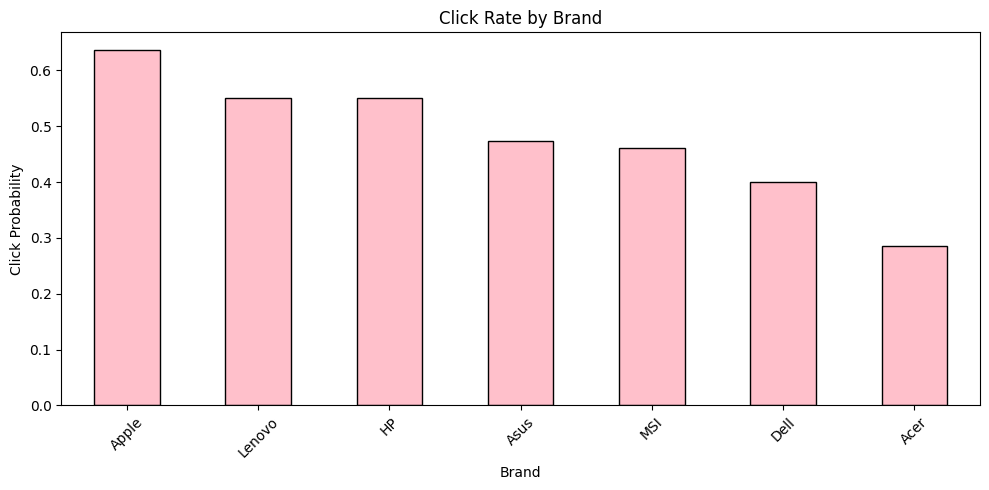

In [29]:
brand_click_rate = df.groupby("Brand")["Clicked"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
brand_click_rate.plot(kind="bar", color="pink", edgecolor="black")
plt.title("Click Rate by Brand")
plt.ylabel("Click Probability")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Calculates average click rate per brand, Shows which brands users prefer

<Axes: xlabel='Rating', ylabel='Count'>

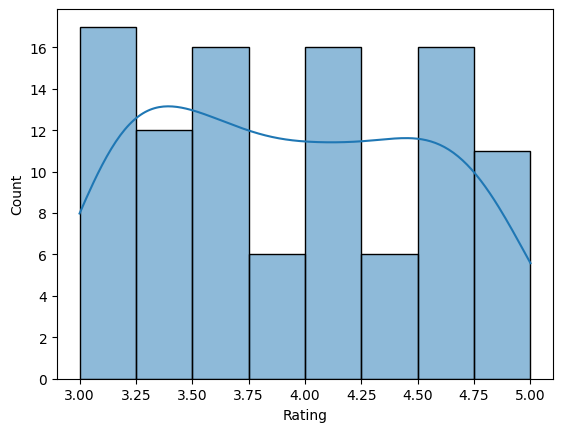

In [26]:
sns.histplot(df["Rating"], kde=True,)

Visualizes how ratings are spread (most are 3.5–4.8)

<Axes: >

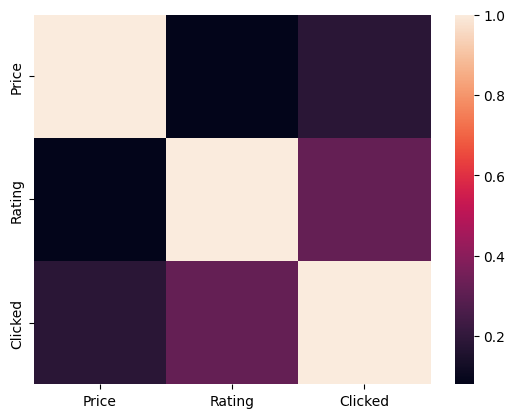

In [27]:
sns.heatmap(df[["Price", "Rating", "Clicked"]].corr())

Shows how much each feature affects clicks (correlation)